In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sea
import plotly.graph_objects as go
import plotly.express as px

pd.set_option('display.max_columns', None)
p2425 = pd.read_csv("./data/season-2425.csv")
p2324 = pd.read_csv("./data/season-2324.csv")
p2223 = pd.read_csv("./data/season-2223.csv")
p2122 = pd.read_csv("./data/season-2122.csv")
p2021 = pd.read_csv("./data/season-2021.csv")
p1920 = pd.read_csv("./data/season-1920.csv")
p1819 = pd.read_csv("./data/season-1819.csv")
p1718 = pd.read_csv("./data/season-1718.csv")
p1617 = pd.read_csv("./data/season-1617.csv")
p1516 = pd.read_csv("./data/season-1516.csv")
p1415 = pd.read_csv("./data/season-1415.csv")
p1314 = pd.read_csv("./data/season-1314.csv")

Prem_DF = pd.concat([p2425, p2324, p2223, p2122, p2021, p1920, p1819, p1718, p1617, p1516, p1415, p1314])
Prem_DF.reset_index(inplace=True)

In [2]:
# HomeTeam -> string --> Home Team
# AwayTeam -> string --> Away Team
# FTHG -> integer --> Full Time Home Team Goals
# FTAG -> integer --> Full Time Away Team Goals
# FTR -> string --> Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG -> integer --> Half Time Home Team Goals
# HTAG -> integer --> Half Time Away Team Goals
# HTR -> string --> Half Time Result (H=Home Win, D=Draw, A=Away Win)
# Referee -> string --> Match Referee
# HS -> integer --> Home Team Shots
# AS -> integer --> Away Team Shots
# HST -> integer --> Home Team Shots on Target
# AST -> integer --> Away Team Shots on Target
# HF -> integer --> Home Team Fouls Committed
# AF -> integer --> Away Team Fouls Committed
# HC -> integer --> Home Team Corners
# AC -> integer --> Away Team Corners
# HY -> integer --> Home Team Yellow Cards
# AY -> integer --> Away Team Yellow Cards
# HR -> integer --> Home Team Red Cards
# AR -> integer --> Away Team Red Cards


In [3]:
Prem_DF


,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Div,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,375,11/05/14,Norwich,Arsenal,0,2,A,0,0,D,L Mason,11,14,5,8,6,5,4,4,1,0,0,0,E0,4.50,3.8,1.85,4.00,3.5,1.87,4.00,3.6,1.8,3.80,3.6,1.90,4.62,3.81,1.85,4.33,3.40,1.85,4.33,3.50,1.83,4.40,3.8,1.87,50.0,4.80,4.31,3.85,3.60,1.91,1.84,37.0,1.65,1.57,2.50,2.36,25.0,0.75,1.85,1.80,2.12,2.07
4405,376,11/05/14,Southampton,Man United,1,1,D,1,0,H,M Dean,15,8,6,2,16,5,6,2,3,2,0,0,E0,2.63,3.5,2.80,2.60,3.3,2.60,2.60,3.2,2.6,2.62,3.4,2.62,2.60,3.65,2.76,2.62,3.10,2.80,2.60,3.30,2.75,2.55,3.5,2.88,51.0,2.63,2.56,3.62,3.37,2.88,2.74,45.0,1.80,1.71,2.20,2.12,27.0,0.00,1.90,1.86,2.06,1.99
4406,377,11/05/14,Sunderland,Swansea,1,3,A,0,2,A,C Foy,20,8,4,4,14,15,6,3,2,3,0,0,E0,2.30,3.4,3.40,2.20,3.4,3.10,2.00,3.3,3.6,2.10,3.4,3.40,2.40,3.40,3.23,2.30,3.20,3.20,2.30,3.25,3.13,2.38,3.4,3.25,51.0,2.40,2.29,3.41,3.28,3.60,3.22,45.0,1.95,1.86,2.06,1.94,24.0,-0.50,2.40,2.30,1.68,1.63
4407,378,11/05/14,Tottenham,Aston Villa,3,0,H,3,0,H,J Moss,12,4,6,1,11,11,5,1,1,0,0,0,E0,1.50,4.5,7.50,1.45,4.5,6.25,1.45,4.0,7.0,1.50,4.2,6.50,1.47,4.64,7.97,1.50,3.80,7.50,1.50,4.00,6.50,1.50,4.5,7.50,51.0,1.52,1.49,4.65,4.25,8.20,6.94,40.0,1.65,1.57,2.56,2.36,29.0,-1.00,1.86,1.77,2.20,2.10


In [4]:
# DATA CLEANING:
# Setting up the DataFrame so it is more suitable for answering my questions, checking for na values and duplicates as well as reformating some columns

In [5]:
Prem_DF.drop(columns="index", inplace=True)

In [6]:
Prem_DF = Prem_DF.iloc[:, :22]
Prem_DF

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,11/05/14,Norwich,Arsenal,0,2,A,0,0,D,L Mason,11,14,5,8,6,5,4,4,1,0,0,0
4405,11/05/14,Southampton,Man United,1,1,D,1,0,H,M Dean,15,8,6,2,16,5,6,2,3,2,0,0
4406,11/05/14,Sunderland,Swansea,1,3,A,0,2,A,C Foy,20,8,4,4,14,15,6,3,2,3,0,0
4407,11/05/14,Tottenham,Aston Villa,3,0,H,3,0,H,J Moss,12,4,6,1,11,11,5,1,1,0,0,0


In [7]:
Prem_DF.isna().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [8]:
Prem_DF.drop_duplicates()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,11/05/14,Norwich,Arsenal,0,2,A,0,0,D,L Mason,11,14,5,8,6,5,4,4,1,0,0,0
4405,11/05/14,Southampton,Man United,1,1,D,1,0,H,M Dean,15,8,6,2,16,5,6,2,3,2,0,0
4406,11/05/14,Sunderland,Swansea,1,3,A,0,2,A,C Foy,20,8,4,4,14,15,6,3,2,3,0,0
4407,11/05/14,Tottenham,Aston Villa,3,0,H,3,0,H,J Moss,12,4,6,1,11,11,5,1,1,0,0,0


In [9]:
Prem_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4409 non-null   object
 1   HomeTeam  4409 non-null   object
 2   AwayTeam  4409 non-null   object
 3   FTHG      4409 non-null   int64 
 4   FTAG      4409 non-null   int64 
 5   FTR       4409 non-null   object
 6   HTHG      4409 non-null   int64 
 7   HTAG      4409 non-null   int64 
 8   HTR       4409 non-null   object
 9   Referee   4409 non-null   object
 10  HS        4409 non-null   int64 
 11  AS        4409 non-null   int64 
 12  HST       4409 non-null   int64 
 13  AST       4409 non-null   int64 
 14  HF        4409 non-null   int64 
 15  AF        4409 non-null   int64 
 16  HC        4409 non-null   int64 
 17  AC        4409 non-null   int64 
 18  HY        4409 non-null   int64 
 19  AY        4409 non-null   int64 
 20  HR        4409 non-null   int64 
 21  AR        4409

In [10]:
Prem_DF.rename(columns={"Date": "date", "HomeTeam": "home", "AwayTeam": "away", "FTHG": "fthg", "FTAG": "ftag", "FTR": "ftr", "HTHG": "hthg", "HTAG": "htag", "HTR": "htr", "Referee": "referee", 
                        "HS": "hs", "AS": "as", "HST": "hst", "AST": "ast", "HF": "hf", "AF": "af", "HC": "hc", "AC": "ac", "HY": "hy", "AY": "ay", "HR": "hr", "AR": "ar"}, inplace=True)

In [11]:
# I forgot the 'inplace=True' and so the rename wasn't working properly, I included the line and then used the print statement below to check renaming happened in the intended way.

In [12]:
print(Prem_DF.columns)

Index(['date', 'home', 'away', 'fthg', 'ftag', 'ftr', 'hthg', 'htag', 'htr',
       'referee', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac', 'hy', 'ay',
       'hr', 'ar'],
      dtype='object')


In [13]:
Prem_DF["date"] = pd.to_datetime(Prem_DF["date"])
Prem_DF

C:\Users\tango\AppData\Local\Temp\ipykernel_10408\141959832.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Prem_DF["date"] = pd.to_datetime(Prem_DF["date"])


,date,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024-08-16,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024-08-17,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024-08-17,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024-08-17,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024-08-17,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2014-11-05,Norwich,Arsenal,0,2,A,0,0,D,L Mason,11,14,5,8,6,5,4,4,1,0,0,0
4405,2014-11-05,Southampton,Man United,1,1,D,1,0,H,M Dean,15,8,6,2,16,5,6,2,3,2,0,0
4406,2014-11-05,Sunderland,Swansea,1,3,A,0,2,A,C Foy,20,8,4,4,14,15,6,3,2,3,0,0
4407,2014-11-05,Tottenham,Aston Villa,3,0,H,3,0,H,J Moss,12,4,6,1,11,11,5,1,1,0,0,0


In [14]:
Prem_DF.insert(1, "year", Prem_DF["date"].dt.year)
Prem_DF

,date,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024-08-16,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024-08-17,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024-08-17,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024-08-17,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024-08-17,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2014-11-05,2014,Norwich,Arsenal,0,2,A,0,0,D,L Mason,11,14,5,8,6,5,4,4,1,0,0,0
4405,2014-11-05,2014,Southampton,Man United,1,1,D,1,0,H,M Dean,15,8,6,2,16,5,6,2,3,2,0,0
4406,2014-11-05,2014,Sunderland,Swansea,1,3,A,0,2,A,C Foy,20,8,4,4,14,15,6,3,2,3,0,0
4407,2014-11-05,2014,Tottenham,Aston Villa,3,0,H,3,0,H,J Moss,12,4,6,1,11,11,5,1,1,0,0,0


In [15]:
Prem_DF["year"].max()

np.int32(2025)

In [16]:
# Making a new 'year' column where the date was, I don't need the full date for my analysis as I am simply interested in the statistics by year.

In [17]:
Prem_DF.drop(columns="date", inplace=True)
Prem_DF

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2014,Norwich,Arsenal,0,2,A,0,0,D,L Mason,11,14,5,8,6,5,4,4,1,0,0,0
4405,2014,Southampton,Man United,1,1,D,1,0,H,M Dean,15,8,6,2,16,5,6,2,3,2,0,0
4406,2014,Sunderland,Swansea,1,3,A,0,2,A,C Foy,20,8,4,4,14,15,6,3,2,3,0,0
4407,2014,Tottenham,Aston Villa,3,0,H,3,0,H,J Moss,12,4,6,1,11,11,5,1,1,0,0,0


In [18]:
Prem_DF = Prem_DF.sort_values(by="year", ascending=False)
Prem_DF = Prem_DF[(Prem_DF["year"] < 2025) & (Prem_DF["year"] > 2013)]
Prem_DF.reset_index(drop=True, inplace=True)

In [19]:
Prem_DF

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,2014,Fulham,Crystal Palace,2,2,D,0,1,A,K Friend,15,15,5,6,11,15,6,4,3,1,0,0
4174,2014,Norwich,West Brom,0,1,A,0,1,A,M Clattenburg,12,8,4,5,10,11,7,3,1,0,0,0
4175,2014,Everton,Arsenal,3,0,H,2,0,H,M Atkinson,14,15,8,5,6,5,3,6,1,2,0,0
4176,2014,West Ham,Liverpool,1,2,A,1,1,D,A Taylor,11,17,1,8,10,9,4,4,4,0,0,0


In [20]:
# Creating a copy of the main DF in the event later on in the project I want to experiment with exploration and end up doing accidental collateral.

In [21]:
Prem_DF_Copy = Prem_DF

In [22]:
Prem_DF_Copy

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,2014,Fulham,Crystal Palace,2,2,D,0,1,A,K Friend,15,15,5,6,11,15,6,4,3,1,0,0
4174,2014,Norwich,West Brom,0,1,A,0,1,A,M Clattenburg,12,8,4,5,10,11,7,3,1,0,0,0
4175,2014,Everton,Arsenal,3,0,H,2,0,H,M Atkinson,14,15,8,5,6,5,3,6,1,2,0,0
4176,2014,West Ham,Liverpool,1,2,A,1,1,D,A Taylor,11,17,1,8,10,9,4,4,4,0,0,0


In [23]:
# Question 1: *Which team has scored the most goals in the past decade?*
# Variables to focus on: 'year', 'home', 'away', 'fthg', 'ftag'

In [24]:
def cycleTeam(year, team):
    TeamYear_DF = Prem_DF.loc[(Prem_DF["year"] == year) & (Prem_DF["home"] == team) + (Prem_DF["away"] == team)]
    return TeamYear_DF

cycleTeam(2017, "Arsenal")


,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
2639,2017,Arsenal,Crystal Palace,2,0,H,1,0,H,A Marriner,22,7,7,4,9,7,8,4,1,1,0,0
2645,2017,Arsenal,Hull,2,0,H,1,0,H,M Clattenburg,17,9,7,4,12,9,3,8,3,1,0,1
2655,2017,Chelsea,Arsenal,3,1,H,1,0,H,M Atkinson,13,9,6,5,14,8,10,13,1,1,0,0
2659,2017,Southampton,Arsenal,1,1,D,1,0,H,R Madley,6,11,3,6,12,10,4,5,2,2,0,0
2671,2017,Swansea,Arsenal,0,4,A,0,1,A,M Jones,12,14,3,6,12,8,3,2,2,0,0,0
2702,2017,Arsenal,Liverpool,3,3,D,0,1,A,M Atkinson,11,14,4,9,9,11,7,8,1,0,0,0
2716,2017,Arsenal,Newcastle,1,0,H,1,0,H,S Attwell,23,10,5,2,13,9,7,5,2,1,0,0
2717,2017,West Ham,Arsenal,0,0,D,0,0,D,J Moss,6,22,0,3,9,9,1,7,1,0,0,0
2719,2017,Crystal Palace,Arsenal,2,3,A,0,1,A,M Oliver,16,16,2,9,12,7,5,4,0,1,0,0
2723,2017,Burnley,Arsenal,0,1,A,0,0,D,L Mason,8,17,2,2,8,14,5,5,2,0,0,0


In [25]:
totalHomeGoals = cycleTeam(2017, "Arsenal")[cycleTeam(2017, "Arsenal")["home"] == "Arsenal"]["fthg"].sum()
totalAwayGoals = cycleTeam(2017, "Arsenal")[cycleTeam(2017, "Arsenal")["away"] == "Arsenal"]["ftag"].sum()
totalGoals = totalHomeGoals + totalAwayGoals

Arsenal2017 = {
    "Home_Goals": int(totalHomeGoals),
    "Away_Goals": int(totalAwayGoals),
    "Total_Goals": int(totalGoals)
}
print(Arsenal2017)

{'Home_Goals': 45, 'Away_Goals': 31, 'Total_Goals': 76}


In [26]:
# Combining the CycleTeam functions and creating a new one 'findTotalGoals' so we can just input a year and team to find the total goals for that year!

In [27]:
def cycleTeam(year, team):
    TeamYear_DF = Prem_DF.loc[(Prem_DF["year"] == year) & (Prem_DF["home"] == team) + (Prem_DF["away"] == team)]
    return TeamYear_DF

def findTotalGoals(year, team):
    totalHomeGoals = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["fthg"].sum()
    totalAwayGoals = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["ftag"].sum()
    totalGoals = totalHomeGoals + totalAwayGoals
    objectName = f"{team}{year}"

    # objectName = {
    #     "Year": year,
    #     "Team": team,
    #     "Home_Goals": int(totalHomeGoals),
    #     "Away_Goals": int(totalAwayGoals),
    #     "Total_Goals": int(totalGoals)
    # }
    return (team, year, int(totalHomeGoals), int(totalAwayGoals), int(totalGoals))

findTotalGoals(2014, "Arsenal")

('Arsenal', 2014, 38, 27, 65)

In [28]:
teams_list = set()
years_list = set()
for index, entry in Prem_DF.iterrows():
    teams_list.add(entry["home"])
    years_list.add(entry["year"])

teams_list = sorted(teams_list)
years_list = sorted(years_list)

print(years_list)

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [29]:
# Now having both a list of all the years and all the teams that played across the decade, I should, in theory be able to cycle these values and input them
# into my shiny new 'findTotalGoals' function!

In [30]:
Goal_Counts = []
def findGoalCounts():
    for year in years_list:
        for team in teams_list:
            Goal_Counts.append(findTotalGoals(year, team))
    return Goal_Counts

tg_by_year = pd.DataFrame(findGoalCounts())
tg_by_year.rename(columns = {0: "Team", 1: "Year", 2: "Total_HG", 3: "Total_AG", 4: "Total_Goals"}, inplace=True)

In [31]:
tg_by_year

,Team,Year,Total_HG,Total_AG,Total_Goals
0,Arsenal,2014,38,27,65
1,Aston Villa,2014,22,10,32
2,Bournemouth,2014,0,0,0
3,Brentford,2014,0,0,0
4,Brighton,2014,0,0,0
...,...,...,...,...,...
380,Tottenham,2024,43,30,73
381,Watford,2024,0,0,0
382,West Brom,2024,0,0,0
383,West Ham,2024,27,23,50


In [32]:
tg_by_year[tg_by_year["Team"] == "Arsenal"]["Total_Goals"].sum()

np.int64(777)

In [33]:
tg_by_decade = []
for team in teams_list:
    tg_by_decade.append({
        "Team": team, 
        "Total_Goals": int(tg_by_year[tg_by_year["Team"] == team]["Total_Goals"].sum())
        })

tg_by_decade


[{'Team': 'Arsenal', 'Total_Goals': 777},
 {'Team': 'Aston Villa', 'Total_Goals': 382},
 {'Team': 'Bournemouth', 'Total_Goals': 361},
 {'Team': 'Brentford', 'Total_Goals': 194},
 {'Team': 'Brighton', 'Total_Goals': 346},
 {'Team': 'Burnley', 'Total_Goals': 299},
 {'Team': 'Cardiff', 'Total_Goals': 51},
 {'Team': 'Chelsea', 'Total_Goals': 734},
 {'Team': 'Crystal Palace', 'Total_Goals': 492},
 {'Team': 'Everton', 'Total_Goals': 520},
 {'Team': 'Fulham', 'Total_Goals': 220},
 {'Team': 'Huddersfield', 'Total_Goals': 50},
 {'Team': 'Hull', 'Total_Goals': 86},
 {'Team': 'Ipswich', 'Total_Goals': 18},
 {'Team': 'Leeds', 'Total_Goals': 152},
 {'Team': 'Leicester', 'Total_Goals': 539},
 {'Team': 'Liverpool', 'Total_Goals': 876},
 {'Team': 'Luton', 'Total_Goals': 52},
 {'Team': 'Man City', 'Total_Goals': 989},
 {'Team': 'Man United', 'Total_Goals': 662},
 {'Team': 'Middlesbrough', 'Total_Goals': 27},
 {'Team': 'Newcastle', 'Total_Goals': 492},
 {'Team': 'Norwich', 'Total_Goals': 100},
 {'Team':

In [34]:
Question_One = pd.DataFrame(tg_by_decade)
Question_One

,Team,Total_Goals
0,Arsenal,777
1,Aston Villa,382
2,Bournemouth,361
3,Brentford,194
4,Brighton,346
5,Burnley,299
6,Cardiff,51
7,Chelsea,734
8,Crystal Palace,492
9,Everton,520


In [35]:
Question_One["Total_Goals"].max()
Question_One["Total_Goals"].idxmax()
Question_One.iloc[18]
print(f"The highest scoring team in the last decade [2014-2025] is {Question_One.iloc[18]["Team"]} with a grand total of: {Question_One["Total_Goals"].max()} goals scored!")

The highest scoring team in the last decade [2014-2025] is Man City with a grand total of: 989 goals scored!


In [36]:
Question_One = Question_One.sort_values(by="Total_Goals", ascending=False)

In [37]:
Question_One.reset_index(drop=True, inplace=True)

In [38]:
Question_One

,Team,Total_Goals
0,Man City,989
1,Liverpool,876
2,Arsenal,777
3,Tottenham,770
4,Chelsea,734
5,Man United,662
6,West Ham,574
7,Leicester,539
8,Everton,520
9,Newcastle,492


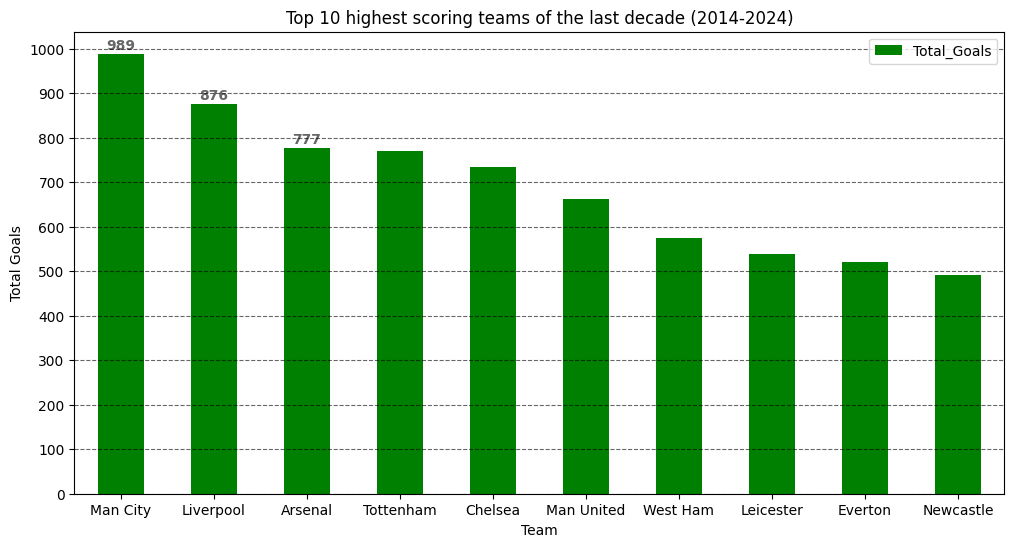

In [39]:
Question_One_Top10 = Question_One.head(10)
Top_10 = Question_One_Top10.plot(x="Team", y="Total_Goals", kind="bar", color="green", figsize=(12,6))

plt.xticks(rotation=0)
plt.yticks(range(0, Question_One_Top10["Total_Goals"].max() + 100, 100))
plt.xlabel("Team")
plt.ylabel("Total Goals")
plt.title("Top 10 highest scoring teams of the last decade (2014-2024)")
plt.grid(axis="y", linestyle="--", color="black", alpha=0.6)

for i, value in enumerate(Question_One_Top10["Total_Goals"]):
    if i < 3:
        plt.text(i, value + 10, str(value), ha="center", fontsize=10, fontweight="bold", color="black", alpha=0.6)
plt.show()

In [40]:
Prem_DF.head()

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0


In [41]:
# Question 2:
# Which team(s) in the past decade, win most of their games at home and which team(s) win most of their games away?
# Looking at total % of wins that are at home/away
# Likely using a pie chart to depict this, total wins - home% / away%
# Variables to focus on: year, home, away, ftr

In [42]:
Home_Winners = Prem_DF[Prem_DF["ftr"] == "H"]["home"]
Away_Winners = Prem_DF[Prem_DF["ftr"] == "A"]["away"]

Home_Winners.reset_index(drop=True, inplace=True)
Away_Winners.reset_index(drop=True, inplace=True)

# print(int(Home_Winners.value_counts()["Arsenal"]), int(Away_Winners.value_counts()["Arsenal"]))

total_wins = []
def totalWins():
    for team in teams_list:
        total_wins.append(
            {
                "Team": team,
                "Home_Wins": int(Home_Winners.value_counts()[team]),
                "Away_Wins": int(Away_Winners.value_counts()[team]),
                "Total_Wins": int(Home_Winners.value_counts()[team] + Away_Winners.value_counts()[team])
            }
        )
    return (total_wins)
print(totalWins())


[{'Team': 'Arsenal', 'Home_Wins': 140, 'Away_Wins': 94, 'Total_Wins': 234}, {'Team': 'Aston Villa', 'Home_Wins': 60, 'Away_Wins': 42, 'Total_Wins': 102}, {'Team': 'Bournemouth', 'Home_Wins': 51, 'Away_Wins': 37, 'Total_Wins': 88}, {'Team': 'Brentford', 'Home_Wins': 29, 'Away_Wins': 16, 'Total_Wins': 45}, {'Team': 'Brighton', 'Home_Wins': 48, 'Away_Wins': 36, 'Total_Wins': 84}, {'Team': 'Burnley', 'Home_Wins': 47, 'Away_Wins': 33, 'Total_Wins': 80}, {'Team': 'Cardiff', 'Home_Wins': 8, 'Away_Wins': 5, 'Total_Wins': 13}, {'Team': 'Chelsea', 'Home_Wins': 116, 'Away_Wins': 106, 'Total_Wins': 222}, {'Team': 'Crystal Palace', 'Home_Wins': 71, 'Away_Wins': 60, 'Total_Wins': 131}, {'Team': 'Everton', 'Home_Wins': 92, 'Away_Wins': 52, 'Total_Wins': 144}, {'Team': 'Fulham', 'Home_Wins': 32, 'Away_Wins': 19, 'Total_Wins': 51}, {'Team': 'Huddersfield', 'Home_Wins': 8, 'Away_Wins': 4, 'Total_Wins': 12}, {'Team': 'Hull', 'Home_Wins': 15, 'Away_Wins': 6, 'Total_Wins': 21}, {'Team': 'Ipswich', 'Home_Wi

In [43]:
Question_Two = pd.DataFrame(total_wins)
Question_Two

,Team,Home_Wins,Away_Wins,Total_Wins
0,Arsenal,140,94,234
1,Aston Villa,60,42,102
2,Bournemouth,51,37,88
3,Brentford,29,16,45
4,Brighton,48,36,84
5,Burnley,47,33,80
6,Cardiff,8,5,13
7,Chelsea,116,106,222
8,Crystal Palace,71,60,131
9,Everton,92,52,144


In [44]:
Question_Two["HomeWin%"] = round((Question_Two["Home_Wins"] / Question_Two["Total_Wins"]), 3) * 100
Question_Two["AwayWin%"] = round((Question_Two["Away_Wins"] / Question_Two["Total_Wins"]), 3) * 100

In [45]:
# Question_Two.drop(columns={"Home%", "Away%"}, inplace=True)

In [46]:
Question_Two.sort_values(by="HomeWin%", ascending=False)

,Team,Home_Wins,Away_Wins,Total_Wins,HomeWin%,AwayWin%
20,Middlesbrough,4,1,5,80.0,20.0
24,QPR,6,2,8,75.0,25.0
22,Norwich,16,6,22,72.7,27.3
12,Hull,15,6,21,71.4,28.6
25,Sheffield United,17,7,24,70.8,29.2
17,Luton,4,2,6,66.7,33.3
11,Huddersfield,8,4,12,66.7,33.3
27,Stoke,36,19,55,65.5,34.5
29,Swansea,35,19,54,64.8,35.2
3,Brentford,29,16,45,64.4,35.6


In [47]:
Prem_DF[Prem_DF["home"] == "Middlesbrough"]

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
2667,2017,Middlesbrough,Leicester,0,0,D,0,0,D,R Madley,9,10,1,4,10,9,2,2,3,0,0,0
2880,2017,Middlesbrough,Man City,2,2,D,1,0,H,K Friend,14,22,6,4,9,9,4,11,4,4,0,0
2894,2017,Middlesbrough,Southampton,1,2,A,0,1,A,A Taylor,14,14,3,4,19,11,6,3,3,0,0,0
2899,2017,Middlesbrough,Arsenal,1,2,A,0,1,A,A Taylor,13,12,5,4,11,16,2,4,2,2,0,0
2916,2017,Middlesbrough,Burnley,0,0,D,0,0,D,M Atkinson,12,7,5,2,9,12,4,3,0,3,0,0
2921,2017,Middlesbrough,Sunderland,1,0,H,1,0,H,M Dean,6,10,2,4,15,11,3,5,3,3,0,0
2972,2017,Middlesbrough,Man United,1,3,A,0,1,A,J Moss,10,14,3,6,9,8,8,3,1,1,0,0
2978,2017,Middlesbrough,Everton,0,0,D,0,0,D,M Dean,9,7,3,3,14,9,5,2,2,0,0,0
3013,2017,Middlesbrough,West Brom,1,1,D,1,1,D,S Attwell,11,16,3,5,12,13,4,2,2,1,0,0
3023,2017,Middlesbrough,West Ham,1,3,A,1,2,A,M Atkinson,11,13,2,5,7,14,7,5,2,1,0,0


In [48]:
# Well.. this is awkward, according to the analysis Middlesbrough have a tremendous win rate of 80% at home! What an incredible team!!!
# Or it would be... if the sample size wasn't so small. To make it a bit more accurate, we'll take into account
# 'draws' and total games!

In [49]:
Home_Winners = Prem_DF[Prem_DF["ftr"] == "H"]["home"]
Draw_Games_Home = Prem_DF[Prem_DF["ftr"] == "D"]["home"]
Draw_Games_Away = Prem_DF[Prem_DF["ftr"] == "D"]["away"]
Away_Winners = Prem_DF[Prem_DF["ftr"] == "A"]["away"]

Home_Winners.reset_index(drop=True, inplace=True)
Away_Winners.reset_index(drop=True, inplace=True)

total_wins = []
def totalWins():
    for team in teams_list:
        Home_Team = Prem_DF[Prem_DF["home"] == team]["home"]
        Away_Team = Prem_DF[Prem_DF["away"] == team]["away"]
        total_wins.append(
            {
                "Team": team,
                "Home_Wins": int(Home_Winners.value_counts()[team]),
                "Draws": int(Draw_Games_Home.value_counts()[team] + Draw_Games_Away.value_counts()[team]),
                "Away_Wins": int(Away_Winners.value_counts()[team]),
                "Total_Wins": int(Home_Winners.value_counts()[team] + Away_Winners.value_counts()[team]),
                "Total_Games": int(Home_Team.value_counts()[team] + Away_Team.value_counts()[team])
            }
        )
    return (total_wins)

print(totalWins())

[{'Team': 'Arsenal', 'Home_Wins': 140, 'Draws': 84, 'Away_Wins': 94, 'Total_Wins': 234, 'Total_Games': 417}, {'Team': 'Aston Villa', 'Home_Wins': 60, 'Draws': 60, 'Away_Wins': 42, 'Total_Wins': 102, 'Total_Games': 304}, {'Team': 'Bournemouth', 'Home_Wins': 51, 'Draws': 64, 'Away_Wins': 37, 'Total_Wins': 88, 'Total_Games': 285}, {'Team': 'Brentford', 'Home_Wins': 29, 'Draws': 33, 'Away_Wins': 16, 'Total_Wins': 45, 'Total_Games': 132}, {'Team': 'Brighton', 'Home_Wins': 48, 'Draws': 94, 'Away_Wins': 36, 'Total_Wins': 84, 'Total_Games': 285}, {'Team': 'Burnley', 'Home_Wins': 47, 'Draws': 79, 'Away_Wins': 33, 'Total_Wins': 80, 'Total_Games': 304}, {'Team': 'Cardiff', 'Home_Wins': 8, 'Draws': 7, 'Away_Wins': 5, 'Total_Wins': 13, 'Total_Games': 57}, {'Team': 'Chelsea', 'Home_Wins': 116, 'Draws': 97, 'Away_Wins': 106, 'Total_Wins': 222, 'Total_Games': 418}, {'Team': 'Crystal Palace', 'Home_Wins': 71, 'Draws': 109, 'Away_Wins': 60, 'Total_Wins': 131, 'Total_Games': 418}, {'Team': 'Everton', 'Ho

In [50]:
Question_Two = pd.DataFrame(total_wins)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games
0,Arsenal,140,84,94,234,417
1,Aston Villa,60,60,42,102,304
2,Bournemouth,51,64,37,88,285
3,Brentford,29,33,16,45,132
4,Brighton,48,94,36,84,285
5,Burnley,47,79,33,80,304
6,Cardiff,8,7,5,13,57
7,Chelsea,116,97,106,222,418
8,Crystal Palace,71,109,60,131,418
9,Everton,92,109,52,144,417


In [51]:
Question_Two["HomeWin%"] = round((Question_Two["Home_Wins"] / Question_Two["Total_Wins"]), 3) * 100
Question_Two["AwayWin%"] = round((Question_Two["Away_Wins"] / Question_Two["Total_Wins"]), 3) * 100
Question_Two["WinRate%"] = round((Question_Two["Total_Wins"] / Question_Two["Total_Games"]), 3) * 100
# Question_Two.drop(columns="WinRate%", inplace=True)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%
0,Arsenal,140,84,94,234,417,59.8,40.2,56.1
1,Aston Villa,60,60,42,102,304,58.8,41.2,33.6
2,Bournemouth,51,64,37,88,285,58.0,42.0,30.9
3,Brentford,29,33,16,45,132,64.4,35.6,34.1
4,Brighton,48,94,36,84,285,57.1,42.9,29.5
5,Burnley,47,79,33,80,304,58.8,41.2,26.3
6,Cardiff,8,7,5,13,57,61.5,38.5,22.8
7,Chelsea,116,97,106,222,418,52.3,47.7,53.1
8,Crystal Palace,71,109,60,131,418,54.2,45.8,31.3
9,Everton,92,109,52,144,417,63.9,36.1,34.5


In [52]:
# Okay this is a bit better, but we can see Middlesbrough, Hull, QPR, Luton and many others haven't played a full seasons worth of games! This is either
# due to incomplete data, or they're part of the current 2025 season. So we want the stats to reflect
# teams that have AT LEAST played an entire seasons worth of games (38+)

In [53]:
# Great! Now lets see which teams actually have the highest home% win rate and away% win rate in a more fair and accurate manner!

In [54]:
Question_Two.sort_values(by="WinRate%", ascending=False)


,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%
18,Man City,157,64,134,291,418,54.0,46.0,69.6
16,Liverpool,145,95,114,259,417,56.0,44.0,62.1
0,Arsenal,140,84,94,234,417,59.8,40.2,56.1
7,Chelsea,116,97,106,222,418,52.3,47.7,53.1
30,Tottenham,133,79,89,222,418,59.9,40.1,53.1
19,Man United,122,101,90,212,418,57.5,42.5,50.7
15,Leicester,81,82,56,137,361,59.1,40.9,38.0
33,West Ham,89,101,60,149,418,59.7,40.3,35.6
34,Wolves,51,57,35,86,247,59.3,40.7,34.8
9,Everton,92,109,52,144,417,63.9,36.1,34.5


In [55]:
# Upon realisation the total_games is not wrong the statistics aren't wrong I was just... reading them wrong! Time to go back and revise that function! 
        # Home_Team = Prem_DF[Prem_DF["home"] == team]["home"]
        # Away_Team = Prem_DF[Prem_DF["away"] == team]["away"]
        # total_games.append({
        #     "Team": team,
        #     "Total_Games": int(Home_Team.value_counts()[team] + Away_Team.value_counts()[team])
        # })

In [56]:
# Okay! Now everything is fixed and teams actually have 38 matches played now - as one would expect! We can use this data :)
# I'm going to add in a draw% and a loss% for better analysis.

In [57]:
Question_Two["DrawRate%"] = round(Question_Two["Draws"] / Question_Two["Total_Games"], 3) * 100
Question_Two["LossRate%"] = round(100 - (Question_Two["WinRate%"] + Question_Two["DrawRate%"]), 3)
Question_Two

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
0,Arsenal,140,84,94,234,417,59.8,40.2,56.1,20.1,23.8
1,Aston Villa,60,60,42,102,304,58.8,41.2,33.6,19.7,46.7
2,Bournemouth,51,64,37,88,285,58.0,42.0,30.9,22.5,46.6
3,Brentford,29,33,16,45,132,64.4,35.6,34.1,25.0,40.9
4,Brighton,48,94,36,84,285,57.1,42.9,29.5,33.0,37.5
5,Burnley,47,79,33,80,304,58.8,41.2,26.3,26.0,47.7
6,Cardiff,8,7,5,13,57,61.5,38.5,22.8,12.3,64.9
7,Chelsea,116,97,106,222,418,52.3,47.7,53.1,23.2,23.7
8,Crystal Palace,71,109,60,131,418,54.2,45.8,31.3,26.1,42.6
9,Everton,92,109,52,144,417,63.9,36.1,34.5,26.1,39.4


In [58]:
# Challenge faced: Burnout from working a lot, made mistakes with creating new data columns in the DataFrame (ie: total_games)
# realised descrepency in the data (ie: some teams playing '18' matches, when there should be 38 minimum)
# had to go back and fix data, a lot of dropping of newly created columns that were messing up the order or presentation, had to use drop() a lot and
# pay attention to code order

In [59]:
Question_Two.sort_values(by="LossRate%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
6,Cardiff,8,7,5,13,57,61.5,38.5,22.8,12.3,64.9
22,Norwich,16,25,6,22,133,72.7,27.3,16.5,18.8,64.7
24,QPR,6,6,2,8,38,75.0,25.0,21.1,15.8,63.1
17,Luton,4,8,2,6,38,66.7,33.3,15.8,21.1,63.1
11,Huddersfield,8,17,4,12,76,66.7,33.3,15.8,22.4,61.8
25,Sheffield United,17,21,7,24,114,70.8,29.2,21.1,18.4,60.5
12,Hull,15,20,6,21,95,71.4,28.6,22.1,21.1,56.8
20,Middlesbrough,4,13,1,5,38,80.0,20.0,13.2,34.2,52.6
13,Ipswich,1,6,2,3,19,33.3,66.7,15.8,31.6,52.6
31,Watford,37,47,25,62,228,59.7,40.3,27.2,20.6,52.2


In [60]:
Question_Two["HomeWin%"].idxmax()
Question_Two.iloc[20]

Team           Middlesbrough
Home_Wins                  4
Draws                     13
Away_Wins                  1
Total_Wins                 5
Total_Games               38
HomeWin%                80.0
AwayWin%                20.0
WinRate%                13.2
DrawRate%               34.2
LossRate%               52.6
Name: 20, dtype: object

In [61]:
Question_Two["AwayWin%"].idxmax()
Question_Two.iloc[13]

Team           Ipswich
Home_Wins            1
Draws                6
Away_Wins            2
Total_Wins           3
Total_Games         19
HomeWin%          33.3
AwayWin%          66.7
WinRate%          15.8
DrawRate%         31.6
LossRate%         52.6
Name: 13, dtype: object

In [62]:
# Given that we want to look at Home Win Rate% and Away Win Rate% in a meaningful way, I think a fair sample size would be to look
# at teams with 50 or more total wins

In [63]:
Question_Two_50Wins = Question_Two[Question_Two["Total_Wins"] >= 50]
Question_Two_50Wins.sort_values(by="AwayWin%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
7,Chelsea,116,97,106,222,418,52.3,47.7,53.1,23.2,23.7
18,Man City,157,64,134,291,418,54.0,46.0,69.6,15.3,15.1
8,Crystal Palace,71,109,60,131,418,54.2,45.8,31.3,26.1,42.6
26,Southampton,64,94,51,115,380,55.7,44.3,30.3,24.7,45.0
16,Liverpool,145,95,114,259,417,56.0,44.0,62.1,22.8,15.1
4,Brighton,48,94,36,84,285,57.1,42.9,29.5,33.0,37.5
19,Man United,122,101,90,212,418,57.5,42.5,50.7,24.2,25.1
2,Bournemouth,51,64,37,88,285,58.0,42.0,30.9,22.5,46.6
1,Aston Villa,60,60,42,102,304,58.8,41.2,33.6,19.7,46.7
5,Burnley,47,79,33,80,304,58.8,41.2,26.3,26.0,47.7


In [64]:
round(float(Question_Two_50Wins["HomeWin%"].mean()), 2)

59.0

In [65]:
round(float(Question_Two_50Wins["AwayWin%"].mean()), 2)


41.0

In [66]:
HomeWin58 = Question_Two_50Wins[Question_Two_50Wins["HomeWin%"] >= 58.0]
Value1 = int(HomeWin58["WinRate%"].mean())
HomeWinLow58 = Question_Two_50Wins[Question_Two_50Wins["HomeWin%"] < 58.0]
Value2 = int(HomeWinLow58["WinRate%"].mean())
AwayWin42 = Question_Two_50Wins[Question_Two_50Wins["AwayWin%"] >= 42.0]
Value3 = int(AwayWin42["WinRate%"].mean())
AwayWinLow42 = Question_Two_50Wins[Question_Two_50Wins["AwayWin%"] < 42.0]
Value4 = int(AwayWinLow42["WinRate%"].mean())

print(f"HomeWinRate >= 58, Avg overall Win Rate%: {Value1}%, HomeWinRate < 58, Avg overall Win Rate%: {Value2}%")
print(f"AwayWinRate >= 42, Avg overall Win Rate%: {Value3}%, HomeWinRate < 42, Avg overall Win Rate%: {Value4}%")


HomeWinRate >= 58, Avg overall Win Rate%: 35%, HomeWinRate < 58, Avg overall Win Rate%: 44%
AwayWinRate >= 42, Avg overall Win Rate%: 44%, HomeWinRate < 42, Avg overall Win Rate%: 35%


In [67]:
Question_Two_50Wins.sort_values(by="HomeWin%", ascending=False)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
27,Stoke,36,46,19,55,171,65.5,34.5,32.2,26.9,40.9
29,Swansea,35,36,19,54,171,64.8,35.2,31.6,21.1,47.3
9,Everton,92,109,52,144,417,63.9,36.1,34.5,26.1,39.4
10,Fulham,32,45,19,51,190,62.7,37.3,26.8,23.7,49.5
21,Newcastle,81,92,49,130,380,62.3,37.7,34.2,24.2,41.6
30,Tottenham,133,79,89,222,418,59.9,40.1,53.1,18.9,28.0
0,Arsenal,140,84,94,234,417,59.8,40.2,56.1,20.1,23.8
31,Watford,37,47,25,62,228,59.7,40.3,27.2,20.6,52.2
33,West Ham,89,101,60,149,418,59.7,40.3,35.6,24.2,40.2
34,Wolves,51,57,35,86,247,59.3,40.7,34.8,23.1,42.1


In [68]:
Question_Two_50Wins.sort_values(by="AwayWin%", ascending=False)


,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
7,Chelsea,116,97,106,222,418,52.3,47.7,53.1,23.2,23.7
18,Man City,157,64,134,291,418,54.0,46.0,69.6,15.3,15.1
8,Crystal Palace,71,109,60,131,418,54.2,45.8,31.3,26.1,42.6
26,Southampton,64,94,51,115,380,55.7,44.3,30.3,24.7,45.0
16,Liverpool,145,95,114,259,417,56.0,44.0,62.1,22.8,15.1
4,Brighton,48,94,36,84,285,57.1,42.9,29.5,33.0,37.5
19,Man United,122,101,90,212,418,57.5,42.5,50.7,24.2,25.1
2,Bournemouth,51,64,37,88,285,58.0,42.0,30.9,22.5,46.6
1,Aston Villa,60,60,42,102,304,58.8,41.2,33.6,19.7,46.7
5,Burnley,47,79,33,80,304,58.8,41.2,26.3,26.0,47.7


In [69]:
Question_Two_50Wins.reset_index(drop=True, inplace=True)
Question_Two_50Wins
# Below command wasn't working properly as it was returning the 9th element and without a reset_index it was the wrong element

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
0,Arsenal,140,84,94,234,417,59.8,40.2,56.1,20.1,23.8
1,Aston Villa,60,60,42,102,304,58.8,41.2,33.6,19.7,46.7
2,Bournemouth,51,64,37,88,285,58.0,42.0,30.9,22.5,46.6
3,Brighton,48,94,36,84,285,57.1,42.9,29.5,33.0,37.5
4,Burnley,47,79,33,80,304,58.8,41.2,26.3,26.0,47.7
5,Chelsea,116,97,106,222,418,52.3,47.7,53.1,23.2,23.7
6,Crystal Palace,71,109,60,131,418,54.2,45.8,31.3,26.1,42.6
7,Everton,92,109,52,144,417,63.9,36.1,34.5,26.1,39.4
8,Fulham,32,45,19,51,190,62.7,37.3,26.8,23.7,49.5
9,Leicester,81,82,56,137,361,59.1,40.9,38.0,22.7,39.3


In [70]:
Highest_HWR = Question_Two_50Wins.iloc[Question_Two_50Wins["HomeWin%"].idxmax()]
Highest_AWR = Question_Two_50Wins.iloc[Question_Two_50Wins["AwayWin%"].idxmax()]
Highest_AWR2 = Question_Two_50Wins.sort_values(by="AwayWin%", ascending=False)
Highest_AWR2.reset_index(drop=True, inplace=True)
Highest_AWR2 = Highest_AWR2.iloc[Highest_AWR2["AwayWin%"].idxmax() + 1]
Highest_AWR2

Team           Man City
Home_Wins           157
Draws                64
Away_Wins           134
Total_Wins          291
Total_Games         418
HomeWin%           54.0
AwayWin%           46.0
WinRate%           69.6
DrawRate%          15.3
LossRate%          15.1
Name: 1, dtype: object

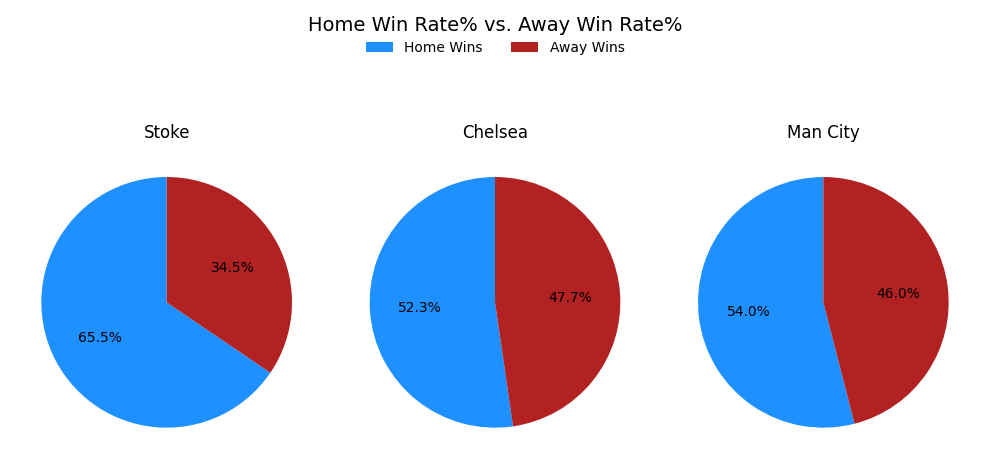

In [71]:
hwr_team = Highest_HWR["Team"]
hwr_percentages = [Highest_HWR["HomeWin%"], Highest_HWR["AwayWin%"]]
hwr_labels = ["Home Wins", "Away Wins"]

awr_team = Highest_AWR["Team"]
awr_percentages = [Highest_AWR["HomeWin%"], Highest_AWR["AwayWin%"]]
awr_labels = ["Home Wins", "Away Wins"]

awr2_team = Highest_AWR2["Team"]
awr2_percentages = [Highest_AWR2["HomeWin%"], Highest_AWR2["AwayWin%"]]
awr2_labels = ["Home Wins", "Away Wins"]

colours = ["dodgerblue", "firebrick"]

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

axes[0].pie(hwr_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[0].set_title(hwr_team)

axes[2].pie(awr2_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[2].set_title(awr2_team)

axes[1].pie(awr_percentages, labels=None, autopct="%1.1f%%", colors=colours, startangle=90)
axes[1].set_title(awr_team)


fig.legend(hwr_labels, loc="upper center", bbox_to_anchor=(0.5, 1), ncol=2, frameon=False, title="Home Win Rate% vs. Away Win Rate%", title_fontsize=14)

plt.tight_layout()
plt.show()

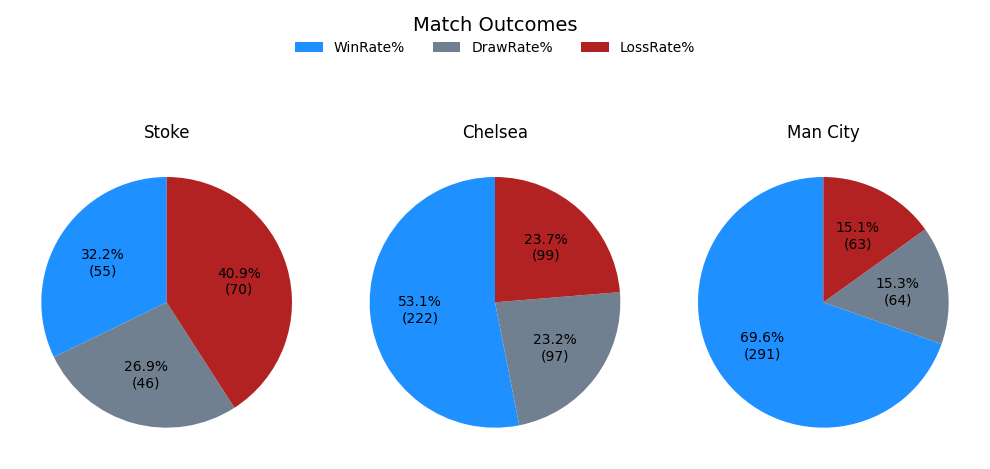

In [72]:
hwr_team = Highest_HWR["Team"]
awr_team = Highest_AWR["Team"]
awr2_team = Highest_AWR2["Team"]

hwr_win_count = Highest_HWR["Total_Wins"]
hwr_draw_count = Highest_HWR["Draws"]
hwr_loss_count = Highest_HWR["Total_Games"] - (hwr_win_count + hwr_draw_count)

awr_win_count = Highest_AWR["Total_Wins"]
awr_draw_count = Highest_AWR["Draws"]
awr_loss_count = Highest_AWR["Total_Games"] - (awr_win_count + awr_draw_count)

awr2_win_count = Highest_AWR2["Total_Wins"]
awr2_draw_count = Highest_AWR2["Draws"]
awr2_loss_count = Highest_AWR2["Total_Games"] - (awr2_win_count + awr2_draw_count)

hwr_counts = [hwr_win_count, hwr_draw_count, hwr_loss_count]
awr_counts = [awr_win_count, awr_draw_count, awr_loss_count]
awr2_counts = [awr2_win_count, awr2_draw_count, awr2_loss_count]

hwr_percentages = [Highest_HWR["WinRate%"], Highest_HWR["DrawRate%"], Highest_HWR["LossRate%"]]
awr_percentages = [Highest_AWR["WinRate%"], Highest_AWR["DrawRate%"], Highest_AWR["LossRate%"]]
awr2_percentages = [Highest_AWR2["WinRate%"], Highest_AWR2["DrawRate%"], Highest_AWR2["LossRate%"]]

colours = ["dodgerblue", "slategrey", "firebrick"]

def autopct_format(pct, total_counts):
    total = int(round(pct * sum(total_counts) / 100.0))
    return f"{pct:.1f}%\n({total})"

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

axes[0].pie(hwr_percentages, labels=None, autopct=lambda pct: autopct_format(pct, hwr_counts), colors=colours, startangle=90)
axes[0].set_title(hwr_team)

axes[1].pie(awr_percentages, labels=None, autopct=lambda pct: autopct_format(pct, awr_counts), colors=colours, startangle=90)
axes[1].set_title(awr_team)

axes[2].pie(awr2_percentages, labels=None, autopct=lambda pct: autopct_format(pct, awr2_counts), colors=colours, startangle=90)
axes[2].set_title(awr2_team)

fig.legend(["WinRate%", "DrawRate%", "LossRate%"], loc="upper center", bbox_to_anchor=(0.5, 1), ncol=3, frameon=False, title="Match Outcomes", title_fontsize=14)

plt.tight_layout()
plt.show()


In [73]:
# Home advantage is real and you are more likely to win at Home, but it is not going to help you win at all.
# Everton had a very high Home Win Rate% and Crystal Palace had a high Away Win Rate% but both teams have
# relatively low overall Win Rate%, conversely Chelsea had the same ratio as Crystal Palace but
# performs significantly better overall. None of the top performing teams have a massively disproportionate
# Home Win Rate% vs. Away Win Rate%. Strong teams have to succeed both Home and Away.

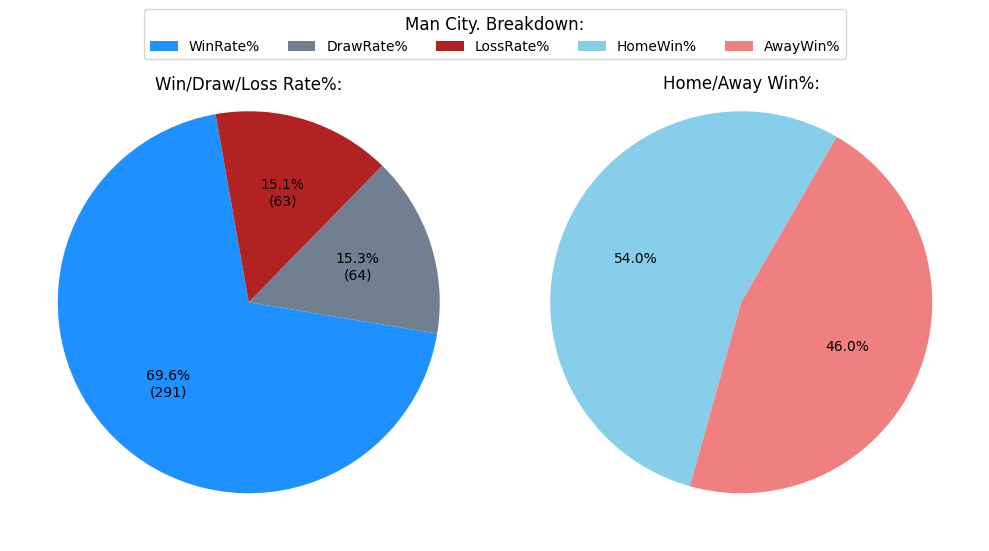

In [74]:
Man_City = Question_Two_50Wins.iloc[Question_Two_50Wins["WinRate%"].idxmax()]
Man_City
colours = ["dodgerblue", "slategrey", "firebrick"]
colours2 = ["skyblue", "lightcoral"]

team = Man_City["Team"]

win_count = Man_City["Total_Wins"]
draw_count = Man_City["Draws"]
loss_count = Man_City["Total_Games"] - (win_count + draw_count)

team_counts = [win_count, draw_count, loss_count]
match_percentages = [Man_City["WinRate%"], Man_City["DrawRate%"], Man_City["LossRate%"]]
home_away_percentages = [Man_City["HomeWin%"], Man_City["AwayWin%"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].pie(match_percentages, labels=None, autopct=lambda pct: autopct_format(pct, team_counts), colors=colours, startangle=100)
axes[0].set_title("Win/Draw/Loss Rate%:", y=0.93)

axes[1].pie(home_away_percentages, labels=None, autopct="%1.1f%%", colors=colours2, startangle=60)
axes[1].set_title("Home/Away Win%:", y=0.93)


fig.legend(["WinRate%", "DrawRate%", "LossRate%", "HomeWin%", "AwayWin%"], loc="upper center", bbox_to_anchor=(0.5, 1), ncol=5, frameon=True, title="Man City. Breakdown:", title_fontsize=12)

plt.tight_layout()
plt.show()


In [75]:
# As we can see looking at the team with the highest win rate% overall, Home and Away win rates do not tell of a teams
# ability or performance, only that teams with a high discrepancy between the two often underperform in overall win rate%

In [76]:
Prem_DF.head()

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0
2,2024,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,18,9,6,3,17,14,8,2,2,2,0,0
3,2024,Everton,Brighton,0,3,A,0,1,A,S Hooper,9,10,1,5,8,8,1,5,1,1,1,0
4,2024,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,3,19,1,4,15,16,3,12,2,4,1,0


In [77]:
# Question 3:
# Is there a correlation between the number of shots taken by a team and the number of goals they score? 
# Variables to examine: year, home, away, (team), fthg, ftag, hs, as, hst, ast

In [78]:
def findTotalShots(year, team):
    totalHomeShots = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["hs"].sum()
    totalAwayShots = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["as"].sum()
    totalHomeTShots = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["hst"].sum()
    totalAwayTShots = cycleTeam(year, team)[cycleTeam(year, team)["away"] == team]["ast"].sum()
    totalShots = totalHomeShots + totalAwayShots
    totalTShots = totalHomeTShots + totalAwayTShots

    return (team, year, int(totalHomeShots), int(totalAwayShots), int(totalHomeTShots), int(totalAwayTShots), int(totalShots), int(totalTShots))

findTotalShots(2016, "Arsenal")

('Arsenal', 2016, 317, 227, 75, 85, 544, 160)

In [79]:
shots_by_season = []
def findShotCounts():
    for year in years_list:
        for team in teams_list:
            shots_by_season.append(findTotalShots(year, team))
    return shots_by_season

ts_by_year = pd.DataFrame(findShotCounts())
ts_by_year.rename(columns = {0: "Team", 1: "Year", 2: "Total_HS", 3: "Total_AS", 4: "Total_HST", 5: "Total_AST", 6: "Total_Shots", 7: "Total_Shots_onTarget"}, inplace=True)

In [80]:
ts_by_year

,Team,Year,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,338,239,93,85,577,178
1,Aston Villa,2014,196,191,96,57,387,153
2,Bournemouth,2014,0,0,0,0,0,0
3,Brentford,2014,0,0,0,0,0,0
4,Brighton,2014,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
380,Tottenham,2024,292,255,80,99,547,179
381,Watford,2024,0,0,0,0,0,0
382,West Brom,2024,0,0,0,0,0,0
383,West Ham,2024,267,242,124,65,509,189


In [81]:
combined_df = pd.merge(tg_by_year, ts_by_year, on=["Team", "Year"])
combined_df

,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,38,27,65,338,239,93,85,577,178
1,Aston Villa,2014,22,10,32,196,191,96,57,387,153
2,Bournemouth,2014,0,0,0,0,0,0,0,0,0
3,Brentford,2014,0,0,0,0,0,0,0,0,0
4,Brighton,2014,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
380,Tottenham,2024,43,30,73,292,255,80,99,547,179
381,Watford,2024,0,0,0,0,0,0,0,0,0
382,West Brom,2024,0,0,0,0,0,0,0,0,0
383,West Ham,2024,27,23,50,267,242,124,65,509,189


In [82]:
# Drop rows where all numeric columns (excluding Team and Year) are 0
goals_and_shots_seasonal = combined_df.loc[~(combined_df.iloc[:, 2:].sum(axis=1) == 0)]
goals_and_shots_seasonal.reset_index(drop=True, inplace=True)
goals_and_shots_seasonal

,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,38,27,65,338,239,93,85,577,178
1,Aston Villa,2014,22,10,32,196,191,96,57,387,153
2,Burnley,2014,7,7,14,126,90,55,27,216,82
3,Cardiff,2014,10,7,17,132,86,64,28,218,92
4,Chelsea,2014,43,34,77,369,315,72,94,684,166
...,...,...,...,...,...,...,...,...,...,...,...
248,Sheffield United,2024,9,11,20,101,95,63,36,196,99
249,Southampton,2024,7,5,12,85,94,57,23,179,80
250,Tottenham,2024,43,30,73,292,255,80,99,547,179
251,West Ham,2024,27,23,50,267,242,124,65,509,189


In [83]:
int(goals_and_shots_seasonal["Total_Goals"].idxmax())
goals_and_shots_seasonal.loc[170]

Team                    Leeds
Year                     2021
Total_HG                   25
Total_AG                   25
Total_Goals                50
Total_HS                  279
Total_AS                  243
Total_HST                 115
Total_AST                  88
Total_Shots               522
Total_Shots_onTarget      203
Name: 170, dtype: object

In [84]:
ts_tg_by_decade = []
for team in teams_list:
    ts_tg_by_decade.append({
        "Team": team,
        "Total_HG": int(tg_by_year[tg_by_year["Team"] == team]["Total_HG"].sum()),
        "Total_AG": int(tg_by_year[tg_by_year["Team"] == team]["Total_AG"].sum()),
        "Total_Goals": int(tg_by_year[tg_by_year["Team"] == team]["Total_Goals"].sum()),
        "Total_HS": int(ts_by_year[ts_by_year["Team"] == team]["Total_HS"].sum()),
        "Total_AS": int(ts_by_year[ts_by_year["Team"] == team]["Total_AS"].sum()),
        "Total_HST": int(ts_by_year[ts_by_year["Team"] == team]["Total_HST"].sum()),
        "Total_AST": int(ts_by_year[ts_by_year["Team"] == team]["Total_AST"].sum()),
        "Total_Shots": int(ts_by_year[ts_by_year["Team"] == team]["Total_Shots"].sum()),
        "Total_Shots_onTarget": int(ts_by_year[ts_by_year["Team"] == team]["Total_Shots_onTarget"].sum())
        })

goals_and_shots_decade = pd.DataFrame(ts_tg_by_decade)
goals_and_shots_decade.head()

,Team,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,441,336,777,3466,2561,893,902,6027,1795
1,Aston Villa,225,157,382,1954,1650,763,549,3604,1312
2,Bournemouth,194,167,361,1825,1597,766,548,3422,1314
3,Brentford,112,82,194,839,662,398,254,1501,652
4,Brighton,184,162,346,2034,1608,648,564,3642,1212


In [85]:
goals_and_shots_decade.sort_values(by="Total_Shots", ascending=False).head()

,Team,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
18,Man City,557,432,989,3908,3377,635,1219,7285,1854
16,Liverpool,479,397,876,3885,3132,773,1145,7017,1918
7,Chelsea,390,344,734,3475,2889,824,991,6364,1815
30,Tottenham,415,355,770,3323,2711,897,1007,6034,1904
0,Arsenal,441,336,777,3466,2561,893,902,6027,1795


In [86]:
goals_and_shots_seasonal.loc[:, "TSCR%"] = (
    round(goals_and_shots_seasonal["Total_Goals"] / goals_and_shots_seasonal["Total_Shots"], 3) * 100
)
goals_and_shots_seasonal.loc[:, "OTCR%"] = (
    round(goals_and_shots_seasonal["Total_Goals"] / goals_and_shots_seasonal["Total_Shots_onTarget"], 3) * 100
)
goals_and_shots_seasonal.head()

C:\Users\tango\AppData\Local\Temp\ipykernel_10408\2739076048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals_and_shots_seasonal.loc[:, "TSCR%"] = (
C:\Users\tango\AppData\Local\Temp\ipykernel_10408\2739076048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals_and_shots_seasonal.loc[:, "OTCR%"] = (


,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,TSCR%,OTCR%
0,Arsenal,2014,38,27,65,338,239,93,85,577,178,11.3,36.5
1,Aston Villa,2014,22,10,32,196,191,96,57,387,153,8.3,20.9
2,Burnley,2014,7,7,14,126,90,55,27,216,82,6.5,17.1
3,Cardiff,2014,10,7,17,132,86,64,28,218,92,7.8,18.5
4,Chelsea,2014,43,34,77,369,315,72,94,684,166,11.3,46.4


In [87]:
# TSCR% is the 'Total Shot Conversion Rate' which is the percentage of Shots that resulted in Goals.
# OTCR% is the 'On Target Conversion Rate' which is the percentage of Shots On Target that resulted in Goals.

In [88]:
goals_and_shots_decade.loc[:, "TSCR%"] = (
    round(goals_and_shots_decade["Total_Goals"] / goals_and_shots_decade["Total_Shots"], 3) * 100
)
goals_and_shots_decade.loc[:, "OTCR%"] = (
    round(goals_and_shots_decade["Total_Goals"] / goals_and_shots_decade["Total_Shots_onTarget"], 3) * 100
)
goals_and_shots_decade.loc[:, "SOT%"] = ( round(goals_and_shots_decade["Total_Shots_onTarget"] / goals_and_shots_decade["Total_Shots"], 3) * 100 )
goals_and_shots_decade.head()

,Team,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,TSCR%,OTCR%,SOT%
0,Arsenal,441,336,777,3466,2561,893,902,6027,1795,12.9,43.3,29.8
1,Aston Villa,225,157,382,1954,1650,763,549,3604,1312,10.6,29.1,36.4
2,Bournemouth,194,167,361,1825,1597,766,548,3422,1314,10.5,27.5,38.4
3,Brentford,112,82,194,839,662,398,254,1501,652,12.9,29.8,43.4
4,Brighton,184,162,346,2034,1608,648,564,3642,1212,9.5,28.5,33.3


In [89]:
goals_and_shots_decade["TSCR%"].idxmax()
goals_and_shots_decade.iloc[13]

Team                    Ipswich
Total_HG                      8
Total_AG                     10
Total_Goals                  18
Total_HS                    117
Total_AS                     68
Total_HST                    57
Total_AST                    26
Total_Shots                 185
Total_Shots_onTarget         83
TSCR%                       9.7
OTCR%                      21.7
SOT%                       44.9
Name: 13, dtype: object

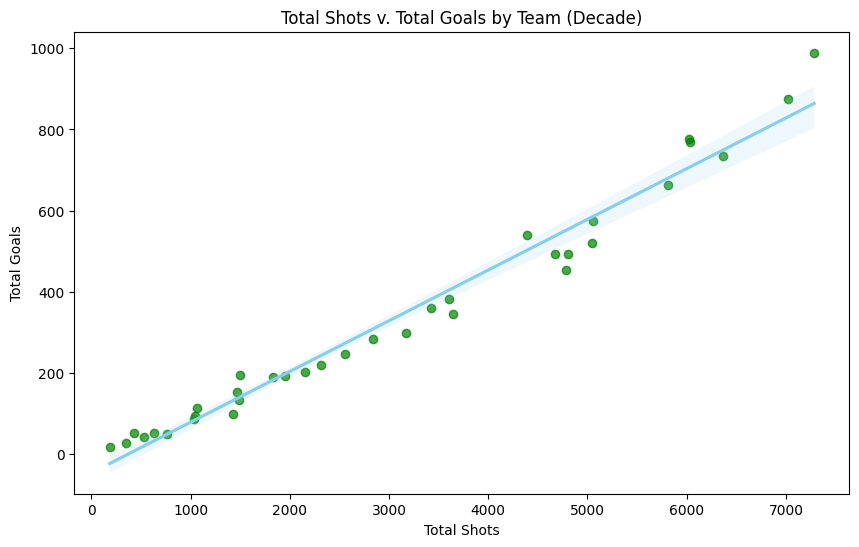

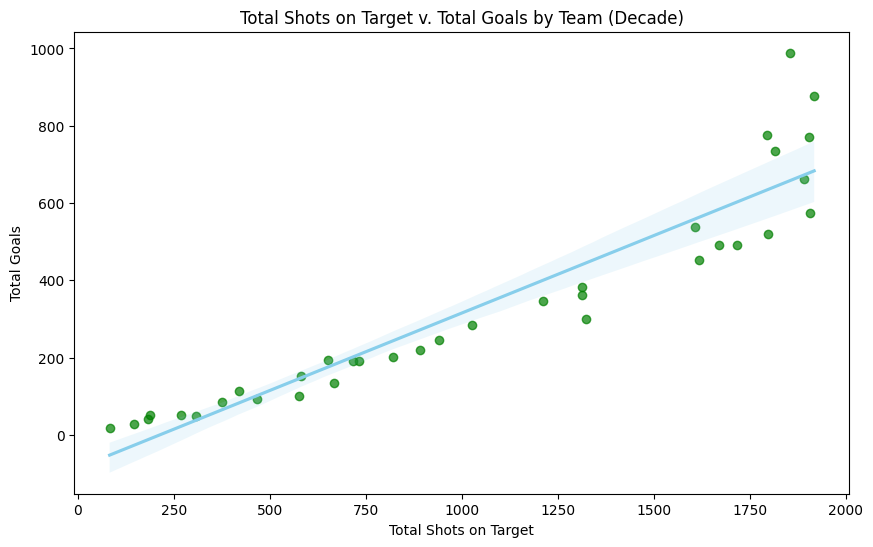

In [90]:
plt.figure(figsize=(10, 6))
sea.regplot(x="Total_Shots", y="Total_Goals", data=goals_and_shots_decade, scatter_kws={"color": "green", "alpha": 0.7}, line_kws={"color": "skyblue"})

plt.xlabel("Total Shots")
plt.ylabel("Total Goals")
plt.title("Total Shots v. Total Goals by Team (Decade)")

plt.show()

plt.figure(figsize=(10, 6))
sea.regplot(x="Total_Shots_onTarget", y="Total_Goals", data=goals_and_shots_decade, scatter_kws={"color": "green", "alpha": 0.7}, line_kws={"color": "skyblue"})

plt.xlabel("Total Shots on Target")
plt.ylabel("Total Goals")
plt.title("Total Shots on Target v. Total Goals by Team (Decade)")

plt.show()

In [91]:
# So, rather unsurprisingly the more shots you take the more goals you also get.
# However there appears to be a stronger correlation between just taking shots, rather than ensuring these shots are 'on target'.

In [92]:
ts_by_year = ts_by_year.loc[~(ts_by_year.iloc[:, 2:].sum(axis=1) == 0)]
ts_by_year.reset_index(drop=True, inplace=True)
ts_by_year.head()

,Team,Year,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget
0,Arsenal,2014,338,239,93,85,577,178
1,Aston Villa,2014,196,191,96,57,387,153
2,Burnley,2014,126,90,55,27,216,82
3,Cardiff,2014,132,86,64,28,218,92
4,Chelsea,2014,369,315,72,94,684,166


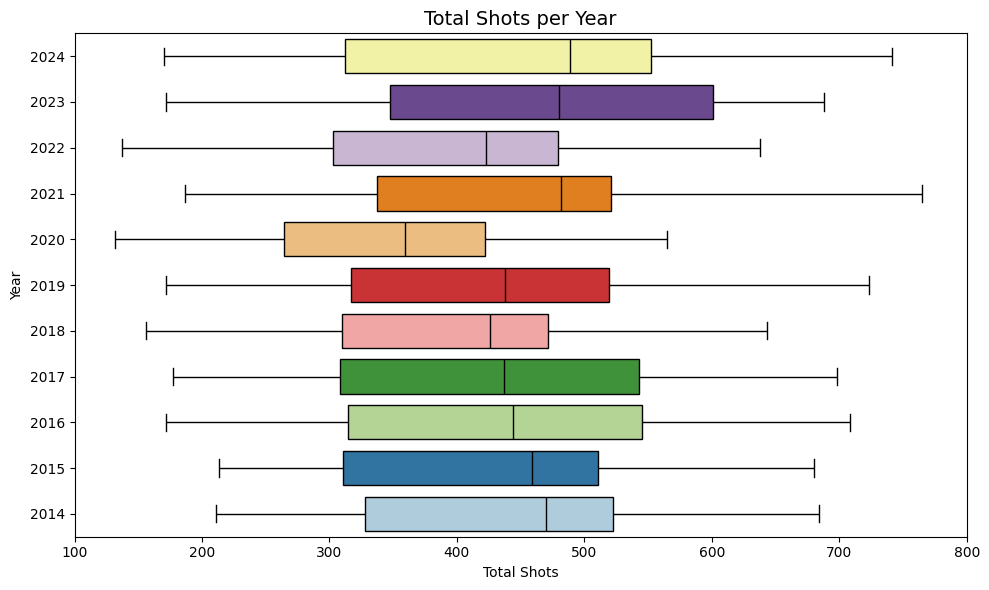

In [93]:
plt.figure(figsize=(10, 6))

sea.boxplot(
    data=ts_by_year,
    y="Year",
    x="Total_Shots",
    hue="Year",
    palette="Paired",
    orient='h',
    width=0.75,
    fliersize=1,
    linewidth=1,
    linecolor="black",
    legend=False
)

plt.xticks(range(100, 900, 100))
plt.grid(False)

plt.xlabel('Total Shots', fontsize=10)
plt.ylabel('Year', fontsize=10)
plt.title('Total Shots per Year', fontsize=14)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [94]:
# The Average total shots doesn't appear to fluctuate too much, in fact Total Shots in general doesn't seem to drastically change too much across the years.
# The only major outlier is 2020 where their were fewer shots overall and the average was drastically lower. Though I suspect this could be related
# to the pandemic at the time. I.e. lack of an audience spurring them on etc;

In [95]:
# plt.figure(figsize=(10, 6))

# sea.boxplot(
#     data=goals_and_shots_seasonal,
#     y="Year",
#     x="TSCR%",
#     hue="Year",
#     palette="Paired",
#     orient='h',
#     width=0.75,
#     fliersize=1,
#     linewidth=1,
#     linecolor="black",
#     legend=False
# )

# plt.xticks(range(0, 80, 10))
# plt.grid(False)

# plt.xlabel('TSCR%: Shots on Target that convert to Goals', fontsize=10)
# plt.ylabel('Year', fontsize=10)
# plt.title('TSCR% of Teams by Year', fontsize=14)

# plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
# plt.gca().invert_yaxis()

# plt.tight_layout()
# plt.show()

In [96]:
# fig = go.Figure()
# # Use x instead of y argument for horizontal plot
# fig.add_trace(go.Box(x=goals_and_shots_seasonal["TSCR%"], quartilemethod="exclusive", name=team))
# fig.update_traces(boxpoints='outliers', jitter=0)


# fig.show()

In [97]:
outlier_teams = {}
for year in goals_and_shots_seasonal['Year'].unique():
    year_data = goals_and_shots_seasonal[goals_and_shots_seasonal['Year'] == year]
    
    Q3 = year_data['TSCR%'].quantile(0.75)
    Q1 = year_data['TSCR%'].quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    outliers = year_data[(year_data['TSCR%'] > upper_fence) | (year_data['TSCR%'] < lower_fence)]
    if not outliers.empty:
        outlier_teams[year] = outliers['Team'].tolist()
    else:
        outlier_teams[year] = []

fig = px.box(goals_and_shots_seasonal, y="Year", x="TSCR%",
             color="Year",
             boxmode="group",
             title="TSCR% of Teams by Year",
             subtitle="plotly express",
             labels={
                 "TSCR%": "TSCR%: Total Shots (Goal)Conversation Rate"
             })

for i, year in enumerate(sorted(goals_and_shots_seasonal['Year'].unique())):
    year_data = goals_and_shots_seasonal[goals_and_shots_seasonal['Year'] == year]
    Q3 = year_data['TSCR%'].quantile(0.75)
    Q1 = year_data['TSCR%'].quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    customdata = []
    for tscr in year_data['TSCR%']:
        if tscr > upper_fence or tscr < lower_fence:
            team = year_data[year_data['TSCR%'] == tscr]['Team'].iloc[0]
            customdata.append(team)
        else:
            customdata.append('')
            
    fig.data[i].customdata = customdata
    fig.data[i].update(
        boxpoints="outliers",
        quartilemethod="linear",
        jitter=0,
        orientation='h',
        width=0.75,
        hovertemplate="<b>Team:</b> %{customdata}<br>" +
                     "<b>TSCR%:</b> %{x:.1f}%"
    )

fig.update_layout(
    height=580,
    width=980,
    xaxis=dict(
        tickmode="array",
        tickvals=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18],
        ticktext=["0%", "2%", "4%", "6%", "8%", "10%", "12%", "14%", "16%", "18%"],
    ),
    yaxis=dict(
        tickmode="array",
        tickvals=sorted(goals_and_shots_seasonal['Year'].unique()),
        ticktext=[str(year) for year in sorted(goals_and_shots_seasonal['Year'].unique())],
    ),
    showlegend=False,
)
fig.show()

In [98]:
#  ASC is a new metric I am adding, it stands for 'Average Shot Coefficent' and it is a measure of how many shots the team
#  makes compared to the mean of that season. Negative values imply they are below the mean and positive values imply they are above
#  the mean. A whole negative of -1 or a whole positive of 1 indicates they were the lowest / highest for shots that season.

In [99]:
goals_and_shots_seasonal.sort_values(by="OTCR%", ascending=False).head(40)
goals_and_shots_seasonal.loc[:, "SOT%"] = ( round(goals_and_shots_seasonal["Total_Shots_onTarget"] / goals_and_shots_seasonal["Total_Shots"], 3) * 100 )
goals_and_shots_seasonal.sort_values(by="SOT%", ascending=False).head()
goals_and_shots_seasonal.sort_values(by="OTCR%", ascending=False).head()

for year in years_list:
    mean = round(goals_and_shots_seasonal[goals_and_shots_seasonal["Year"] == year]["Total_Shots"].mean())
    max_shots = goals_and_shots_seasonal[goals_and_shots_seasonal["Year"] == year]["Total_Shots"].max()
    goals_and_shots_seasonal.loc[goals_and_shots_seasonal["Year"] == year, "ASC"] = \
        round(goals_and_shots_seasonal.loc[goals_and_shots_seasonal["Year"] == year, "Total_Shots"].apply(lambda x: min(max((x - mean) / (max_shots - mean), -1), 1)), 2)
    
goals_and_shots_seasonal.sort_values(by="ASC", ascending=False).tail(20)

C:\Users\tango\AppData\Local\Temp\ipykernel_10408\3513615210.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tango\AppData\Local\Temp\ipykernel_10408\3513615210.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,TSCR%,OTCR%,SOT%,ASC
86,Sunderland,2017,5,7,12,111,90,69,31,201,100,6.0,12.0,49.8,-0.89
200,Norwich,2022,7,8,15,90,90,64,25,180,89,8.3,16.9,49.4,-0.90
76,Huddersfield,2017,10,8,18,107,92,46,32,199,78,9.0,23.1,39.2,-0.90
9,Leicester,2014,12,5,17,126,85,55,27,211,82,8.1,20.7,38.9,-0.91
249,Southampton,2024,7,5,12,85,94,57,23,179,80,6.7,15.0,44.7,-0.91
217,Leeds,2023,13,12,25,151,112,64,34,263,98,9.5,25.5,37.3,-0.91
112,West Brom,2018,11,5,16,85,82,47,25,167,72,9.6,22.2,43.1,-0.93
241,Leicester,2024,11,11,22,87,83,62,31,170,93,12.9,23.7,54.7,-0.94
71,Brighton,2017,10,5,15,95,91,51,26,186,77,8.1,19.5,41.4,-0.95
108,Stoke,2018,7,5,12,85,74,62,29,159,91,7.5,13.2,57.2,-0.97


In [100]:
goals_and_shots_seasonal[(goals_and_shots_seasonal["ASC"] > 0.6) & (goals_and_shots_seasonal["OTCR%"] >= 51)]

,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,TSCR%,OTCR%,SOT%,ASC
11,Man City,2014,42,47,89,337,317,68,106,654,174,13.6,51.1,26.6,0.88
73,Chelsea,2017,48,34,82,362,267,50,82,629,132,13.0,62.1,21.0,0.74
80,Man City,2017,56,46,102,364,334,49,120,698,169,14.6,60.4,24.2,1.00
103,Liverpool,2018,51,33,84,316,262,60,100,578,160,14.5,52.5,27.7,0.74
104,Man City,2018,60,39,99,381,262,56,100,643,156,15.4,63.5,24.3,1.00
128,Man City,2019,49,46,95,385,338,53,124,723,177,13.1,53.7,24.5,1.00
173,Man City,2021,60,53,113,416,349,53,129,765,182,14.8,62.1,23.8,1.00
184,Arsenal,2022,40,29,69,322,235,61,73,557,134,12.4,51.5,24.1,0.66
197,Man City,2022,58,34,92,333,293,36,96,626,132,14.7,69.7,21.1,0.95
207,Arsenal,2023,53,32,85,398,268,71,85,666,156,12.8,54.5,23.4,0.90


In [101]:
goals_and_shots_seasonal[(goals_and_shots_seasonal["ASC"] > 0.6) & (goals_and_shots_seasonal["OTCR%"] >= 51)]["Team"].value_counts()

Team
Man City     6
Arsenal      2
Chelsea      1
Liverpool    1
Name: count, dtype: int64

In [102]:
goals_and_shots_seasonal[(goals_and_shots_seasonal["Year"] == 2020)].sort_values(by="ASC", ascending=False)

,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,TSCR%,OTCR%,SOT%,ASC
150,Man City,2020,44,25,69,284,281,46,95,565,141,12.2,48.9,25.0,1.00
149,Liverpool,2020,46,29,75,288,248,66,98,536,164,14.0,45.7,30.6,0.87
143,Chelsea,2020,37,28,65,273,248,65,81,521,146,12.5,44.5,28.0,0.80
151,Man United,2020,30,35,65,243,205,58,88,448,146,14.5,44.5,32.6,0.46
148,Leicester,2020,27,26,53,212,237,68,85,449,153,11.8,34.6,34.1,0.46
139,Aston Villa,2020,24,20,44,233,191,59,61,424,120,10.4,36.7,28.3,0.35
155,Southampton,2020,24,28,52,218,202,71,81,420,152,12.4,34.2,36.2,0.33
141,Brighton,2020,13,20,33,215,197,58,58,412,116,8.0,28.4,28.2,0.29
159,West Ham,2020,30,21,51,214,188,77,63,402,140,12.7,36.4,34.8,0.25
160,Wolves,2020,20,17,37,223,176,57,57,399,114,9.3,32.5,28.6,0.23


In [103]:
# Was initially called accuracy but that didn't feel like a specific enough metric, so now I've created two new ones and
# retroactively added them, TSCR% and OTCR% (Total Shot Conversion Rate & On Target Conversion Rate) with these two
# I am better able to assess if teams require more quality 'finishing' or 'shot selection' or both.

In [104]:
outlier_teams = {}
for year in goals_and_shots_seasonal['Year'].unique():
    year_data = goals_and_shots_seasonal[goals_and_shots_seasonal['Year'] == year]
    
    Q3 = year_data['OTCR%'].quantile(0.75)
    Q1 = year_data['OTCR%'].quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    outliers = year_data[(year_data['OTCR%'] > upper_fence) | (year_data['OTCR%'] < lower_fence)]
    if not outliers.empty:
        outlier_teams[year] = outliers['Team'].tolist()
    else:
        outlier_teams[year] = []

fig = px.box(goals_and_shots_seasonal, y="Year", x="OTCR%",
             color="Year",
             boxmode="group",
             title="OTCR% of Teams by Year",
             subtitle="plotly express",
             labels={
                 "OTCR%": "OTCR%: On Target(Shots) (Goal)Conversation Rate"
             })

for i, year in enumerate(sorted(goals_and_shots_seasonal['Year'].unique())):
    year_data = goals_and_shots_seasonal[goals_and_shots_seasonal['Year'] == year]
    Q3 = year_data['OTCR%'].quantile(0.75)
    Q1 = year_data['OTCR%'].quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    customdata = []
    for otcr in year_data['OTCR%']:
        if otcr > upper_fence or otcr < lower_fence:
            team = year_data[year_data['OTCR%'] == otcr]['Team'].iloc[0]
            customdata.append(team)
        else:
            customdata.append('')
            
    fig.data[i].customdata = customdata
    fig.data[i].update(
        boxpoints="outliers",
        quartilemethod="linear",
        jitter=0,
        orientation='h',
        width=0.75,
        hovertemplate="<b>Team:</b> %{customdata}<br>" +
                     "<b>OTCR%:</b> %{x:.1f}%"
    )

fig.update_layout(
    height=580,
    width=980,
    xaxis=dict(
        tickmode="array",
        tickvals=[0, 10, 20, 30, 40, 50, 60, 70],
        ticktext=["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%"],
    ),
    yaxis=dict(
        tickmode="array",
        tickvals=sorted(goals_and_shots_seasonal['Year'].unique()),
        ticktext=[str(year) for year in sorted(goals_and_shots_seasonal['Year'].unique())],
    ),
    showlegend=False,
)
fig.show()

In [105]:
# Line chart of ASC over the years for teams which have played in the league every year since 2014.
# ASC can serve some value in demonstrating a teams attacking momentum, as if they are doing more shots they tend to have
# more control over the pace of the game


In [106]:
exclude = ["Leicester", "Burnley", "Southampton", "Newcastle"]
teams_counts = goals_and_shots_seasonal.groupby('Team')['Year'].nunique()
played_every_year = teams_counts[teams_counts == len(years_list)].index
played_every_year = [team for team in played_every_year if team not in exclude]
every_season_DF = goals_and_shots_seasonal[goals_and_shots_seasonal['Team'].isin(played_every_year)]

every_season_DF.reset_index(drop=True, inplace=True)
every_season_DF

new_data = []
for _, row in every_season_DF.iterrows():
    new_data.append({
        "Team": row["Team"],
        "Year": row["Year"],
        "ASC": row["ASC"]
    })

every_season_DF = pd.DataFrame(new_data)
every_season_DF.head()


,Team,Year,ASC
0,Arsenal,2014,0.57
1,Chelsea,2014,1.00
2,Crystal Palace,2014,-0.11
3,Everton,2014,0.33
4,Liverpool,2014,0.74


In [107]:

fig = px.line(
    every_season_DF, 
    x="Year", 
    y="ASC", 
    color="Team",
    markers=False, 
    title="ASC (Average Shot Coefficent) Performance of Teams Over the Years"
)

fig.update_layout(
    height=620,
    width=1000,
    xaxis_title="Year",
    yaxis_title="ASC",
    yaxis=dict(zeroline=True, zerolinewidth=1, zerolinecolor="black"),
    legend_title="Teams",
    template="plotly_white",
)

fig.show()


In [108]:
team_asc_averages = []
for team in played_every_year:
    if(team in exclude):
        pass
    else:
        team_asc_averages.append({
            "Team": team,
            "ASC_avg": float(round(every_season_DF[every_season_DF["Team"] == team]["ASC"].mean(), 2))
        })

asc_decade_average_ESP = pd.DataFrame(team_asc_averages)

asc_decade_average_ESP = asc_decade_average_ESP.sort_values(by="ASC_avg", ascending=False)
asc_decade_average_ESP.reset_index(drop=True, inplace=True)
asc_decade_average_ESP.head(3)

            


,Team,ASC_avg
0,Man City,0.91
1,Liverpool,0.83
2,Chelsea,0.60


In [109]:
goals_and_shots_seasonal.head(1)

,Team,Year,Total_HG,Total_AG,Total_Goals,Total_HS,Total_AS,Total_HST,Total_AST,Total_Shots,Total_Shots_onTarget,TSCR%,OTCR%,SOT%,ASC
0,Arsenal,2014,38,27,65,338,239,93,85,577,178,11.3,36.5,30.8,0.57


In [110]:
Question_Two.head(1)

,Team,Home_Wins,Draws,Away_Wins,Total_Wins,Total_Games,HomeWin%,AwayWin%,WinRate%,DrawRate%,LossRate%
0,Arsenal,140,84,94,234,417,59.8,40.2,56.1,20.1,23.8


In [111]:
# Consolodate: Total_Games/WinRate/DrawRate/LossRate/Total_Goals/Total_Shots/TSCR%/OTCR%/SOT%/ASC
# DO FOR: Yearly + Entire Decade
# Display as: Team, [Year], Total_Games / Total_Goals / Total_Shots / Total_Corners / Total_Fouls / WinRate / LossRate / DrawRate / SOT% / OTCR% / TSCR% / ASC

# Relevant DFs (Yearly):
#   tg_by_year, ts_by_year

# Relevant DFs (Decade):
#   Question_Two, goals_and_shots_decade

# TODO: Get Total_Corners & Total_Fouls for Decade.
#       Get ASC for Decade.
#       Get Total_Games per Year.
#       Get WinRate, LossRate, DrawRate / Total_Corners, Total_Fouls and ASC per Year.
#       Combine missing stats into Mega_Seasonal_DF & Mega_Decade_DF
#       Analyse! & Done!
#       Relax <3

In [114]:
Prem_DF.head(2)

,year,home,away,fthg,ftag,ftr,hthg,htag,htr,referee,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2024,Man United,Fulham,1,0,H,0,0,D,R Jones,14,10,5,2,12,10,7,8,2,3,0,0
1,2024,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,7,18,2,5,9,18,2,10,3,1,0,0


In [123]:
def corners_and_fouls(year, team):
    totalHC = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["hc"].sum()
    totalAC = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["ac"].sum()
    totalHF = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["hf"].sum()
    totalAF = cycleTeam(year, team)[cycleTeam(year, team)["home"] == team]["hf"].sum()
    Total_Corners = totalHC + totalAC
    Total_Fouls = totalHF + totalAF
    return (team, year, int(Total_Corners), int(Total_Fouls))

Corners_Fouls_Count = []
def findCornersFouls():
    for year in years_list:
        for team in teams_list:
            Corners_Fouls_Count.append(corners_and_fouls(year, team))
    return Corners_Fouls_Count

tc_tf_by_year = pd.DataFrame(findCornersFouls())
tc_tf_by_year.rename(columns = {0: "Team", 1: "Year", 2: "Total_Corners", 3: "Total_Fouls"}, inplace=True)
tc_tf_by_year = tc_tf_by_year.loc[~(tc_tf_by_year["Total_Corners"] == 0) | ~(tc_tf_by_year["Total_Fouls"] == 0)]
tc_tf_by_year.reset_index(drop=True, inplace=True)
tc_tf_by_year

,Team,Year,Total_Corners,Total_Fouls
0,Arsenal,2014,228,350
1,Aston Villa,2014,180,394
2,Burnley,2014,81,208
3,Cardiff,2014,129,130
4,Chelsea,2014,201,390
...,...,...,...,...
248,Sheffield United,2024,93,174
249,Southampton,2024,94,212
250,Tottenham,2024,249,422
251,West Ham,2024,212,430


In [112]:
Mega_Decade_DF = pd.merge(Question_Two, goals_and_shots_decade, on="Team", how="inner")
columns_to_keep = ["Team", "Total_Games", "Total_Goals", "Total_Shots", 
                   "WinRate%", "LossRate%", "DrawRate%", "SOT%", "OTCR%", "TSCR%"]

Mega_Decade_DF = Mega_Decade_DF[columns_to_keep]
Mega_Decade_DF.head(3)


,Team,Total_Games,Total_Goals,Total_Shots,WinRate%,LossRate%,DrawRate%,SOT%,OTCR%,TSCR%
0,Arsenal,417,777,6027,56.1,23.8,20.1,29.8,43.3,12.9
1,Aston Villa,304,382,3604,33.6,46.7,19.7,36.4,29.1,10.6
2,Bournemouth,285,361,3422,30.9,46.6,22.5,38.4,27.5,10.5


In [125]:
Mega_Seasonal_DF = pd.merge(ts_by_year, tg_by_year, on=["Team", "Year"], how="inner")
columns_to_keep = ["Team", "Year", "Total_Goals", "Total_Shots"]

Mega_Seasonal_DF = Mega_Seasonal_DF[columns_to_keep]
Mega_Seasonal_DF


,Team,Year,Total_Goals,Total_Shots
0,Arsenal,2014,65,577
1,Aston Villa,2014,32,387
2,Burnley,2014,14,216
3,Cardiff,2014,17,218
4,Chelsea,2014,77,684
...,...,...,...,...
248,Sheffield United,2024,20,196
249,Southampton,2024,12,179
250,Tottenham,2024,73,547
251,West Ham,2024,50,509
